In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from IPython.display import display, HTML
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('new_dados_isolador40.csv', sep=';', decimal =',')

In [10]:
df.head(5)

,umidade,temperatura,pressao,vento_ang,vent_veloc,chuva,corrente_fuga,A,B,C,K,Uc
0,70,29.6,1016,278,1.4,0,0.024992,0.086084,0.074070,5.799708,1.499261,24119.27040
1,69,29.7,1016,297,1.4,0,0.022767,0.086084,0.070696,5.846330,1.503274,25805.31545
2,70,29.8,1016,273,1.6,0,0.022607,0.086084,0.070447,5.849856,1.503577,25937.52914
3,68,29.8,1016,243,2.6,0,0.022426,0.086084,0.070164,5.853876,1.503923,26089.05394
4,68,29.7,1016,257,2.8,0,0.031797,0.086084,0.083548,5.679300,1.488895,20256.54987


In [11]:
df.shape

(40316, 12)

In [12]:
display(df.columns.values)

array(['umidade', 'temperatura', 'pressao', 'vento_ang', 'vent_veloc',
       'chuva', 'corrente_fuga', 'A', 'B', 'C', 'K', 'Uc'], dtype=object)

In [13]:
df.isnull().any()

umidade          False
temperatura      False
pressao          False
vento_ang        False
vent_veloc       False
chuva            False
corrente_fuga    False
A                False
B                False
C                False
K                False
Uc               False
dtype: bool

In [14]:
(df == 0).sum()

umidade              0
temperatura          0
pressao              0
vento_ang           92
vent_veloc       14511
chuva            38064
corrente_fuga        0
A                    0
B                    0
C                    0
K                    0
Uc                   0
dtype: int64

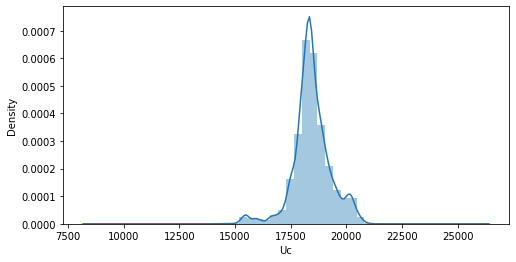

In [15]:
plt.figure(figsize=(8,4))
plt.tight_layout()
sns.distplot(df.Uc);

In [16]:
def distplots_dataframe(df_analisado):
    fig, ax = plt.subplots(3, 3, figsize=(14,8))
    fig.tight_layout(pad=3.0)
    
    sns.distplot(df_analisado.umidade, ax=ax[0,0])
    sns.distplot(df_analisado.temperatura, ax=ax[0,1])
    sns.distplot(df_analisado.pressao, ax=ax[0,2])
    sns.distplot(df_analisado.vento_ang, ax=ax[1,0])
    sns.distplot(df_analisado.vent_veloc, ax=ax[1,1])
    sns.distplot(df_analisado.chuva, ax=ax[1,2])
    sns.distplot(df_analisado.corrente_fuga, ax=ax[2,0])
    sns.distplot(df_analisado.Uc, ax=ax[2,1])
    
    plt.show()

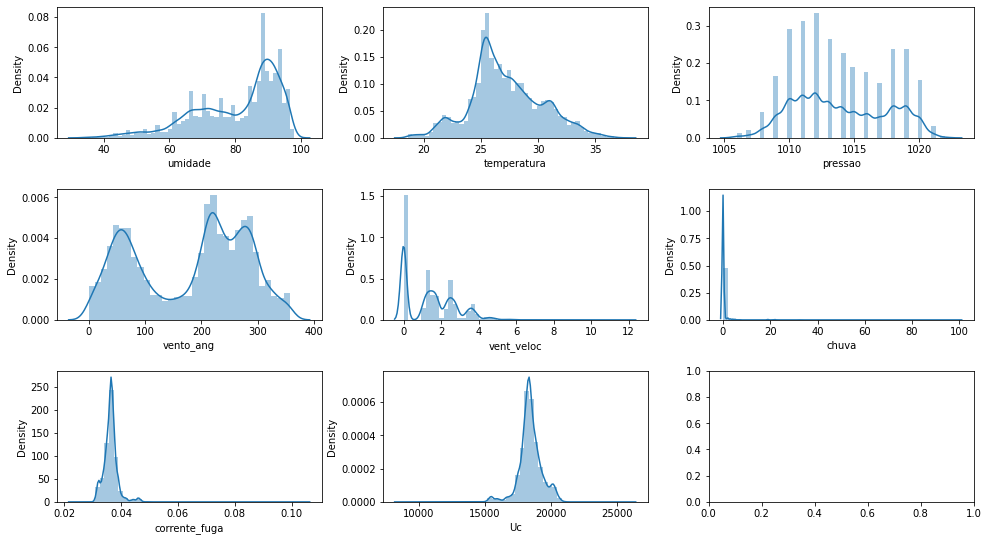

In [17]:
distplots_dataframe(df)

In [19]:
min_scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = pd.DataFrame(min_scaler.fit_transform(df), columns=df.columns)

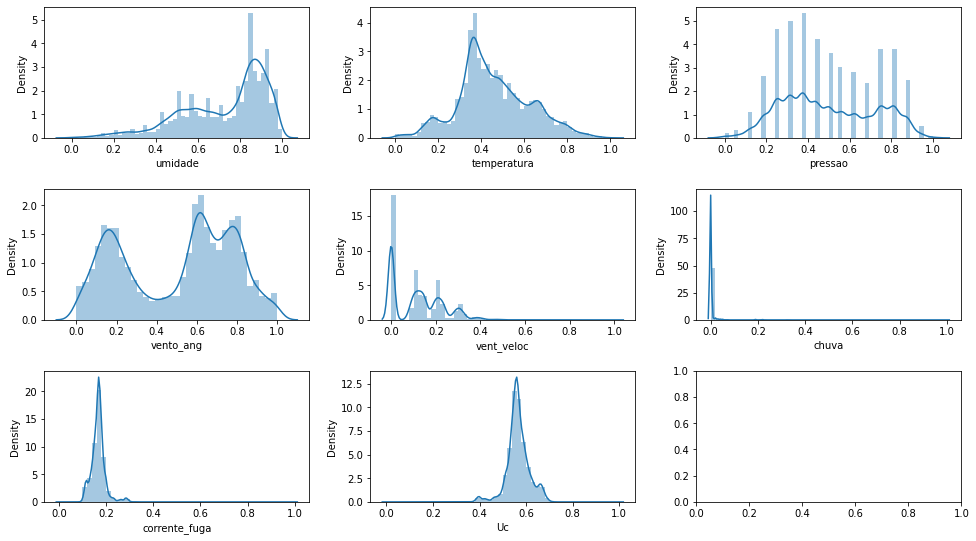

In [20]:
distplots_dataframe(scaled_data)

In [21]:
df = scaled_data
df.describe()

,umidade,temperatura,pressao,vento_ang,vent_veloc,chuva,corrente_fuga,A,B,C,K,Uc
count,40316.000000,40316.000000,40316.000000,40316.000000,40316.000000,40316.000000,40316.000000,40316.0,40316.000000,40316.000000,40316.000000,40316.000000
mean,0.726673,0.456358,0.495887,0.503842,0.120464,0.003483,0.167389,0.0,0.232764,0.689886,0.689886,0.565510
std,0.201368,0.166669,0.223528,0.278183,0.111802,0.027008,0.030226,0.0,0.036649,0.042686,0.042686,0.049263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.578125,0.351064,0.312500,0.210084,0.000000,0.000000,0.152262,0.0,0.214385,0.671046,0.671046,0.542425
50%,0.796875,0.430851,0.437500,0.588235,0.117647,0.000000,0.167479,0.0,0.233494,0.688307,0.688307,0.562473
75%,0.890625,0.563830,0.687500,0.742297,0.201681,0.000000,0.179329,0.0,0.248145,0.711173,0.711173,0.589635
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [22]:
def boxplots_dataframe(df_analisado):
    fig, ax = plt.subplots(2, 3, figsize=(14,8))
    fig.tight_layout(pad=3.0)
    
    ax[0,0].boxplot(df_analisado.umidade)
    ax[0,1].boxplot(df_analisado.temperatura)
    ax[0,2].boxplot(df_analisado.pressao)
    ax[1,0].boxplot(df_analisado.vento_ang)
    ax[1,1].boxplot(df_analisado.vent_veloc)
    ax[1,2].boxplot(df_analisado.chuva)

    ax[0,0].set_title('Umidade')
    ax[0,1].set_title('Temperatura')
    ax[0,2].set_title('Pressão')
    ax[1,0].set_title('Ângulo do vento')
    ax[1,1].set_title('Velocidade do vento')
    ax[1,2].set_title('Chuva (mm)')

    plt.show()

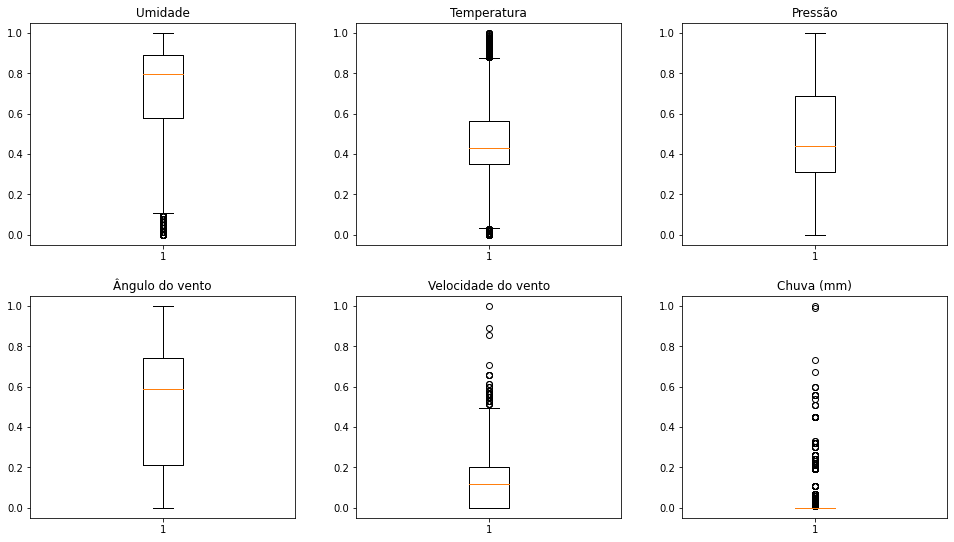

In [23]:
boxplots_dataframe(df)

In [24]:
df.corr().style.format("{:.5}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,umidade,temperatura,pressao,vento_ang,vent_veloc,chuva,corrente_fuga,A,B,C,K,Uc
umidade,1.0,-0.44157,-0.20368,0.32259,-0.50396,0.11214,0.69658,nan,0.72056,-0.74008,-0.74008,-0.76278
temperatura,-0.44157,1.0,-0.39874,-0.43925,0.45762,-0.11037,-0.34919,nan,-0.35956,0.36748,0.36748,0.3759
pressao,-0.20368,-0.39874,1.0,-0.011539,-0.045943,0.044076,-0.064254,nan,-0.068527,0.072534,0.072534,0.077962
vento_ang,0.32259,-0.43925,-0.011539,1.0,-0.34307,0.0424,0.22667,nan,0.23102,-0.23374,-0.23374,-0.23568
vent_veloc,-0.50396,0.45762,-0.045943,-0.34307,1.0,-0.0043842,-0.3078,nan,-0.31741,0.32493,0.32493,0.33315
chuva,0.11214,-0.11037,0.044076,0.0424,-0.0043842,1.0,0.29679,nan,0.29242,-0.28624,-0.28624,-0.27544
corrente_fuga,0.69658,-0.34919,-0.064254,0.22667,-0.3078,0.29679,1.0,nan,0.99804,-0.99345,-0.99345,-0.98433
A,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
B,0.72056,-0.35956,-0.068527,0.23102,-0.31741,0.29242,0.99804,nan,1.0,-0.99863,-0.99863,-0.99328
C,-0.74008,0.36748,0.072534,-0.23374,0.32493,-0.28624,-0.99345,nan,-0.99863,1.0,1.0,0.99794


In [25]:
df.corr()['Uc']

umidade         -0.762777
temperatura      0.375896
pressao          0.077962
vento_ang       -0.235681
vent_veloc       0.333150
chuva           -0.275440
corrente_fuga   -0.984327
A                     NaN
B               -0.993281
C                0.997940
K                0.997940
Uc               1.000000
Name: Uc, dtype: float64

In [51]:
def calcula_regressao(columns):
    X_train, X_test, y_train, y_test = train_test_split(df[columns], df['Uc'], test_size=0.4, random_state=2)
    lr = LinearRegression(normalize = False, fit_intercept=True)
    
    model_lr = lr.fit(X_train, y_train)
    result_lr = model_lr.predict(X_test)
    
    mse_lr = mean_squared_error(y_test, result_lr)
    
    rmse_lr = (np.sqrt(mse_lr))
    
    score_lr = model_lr.score(X_test, y_test)
    
    print('Resultados do erro médio e score (acurácia do modelo) para o dataset de teste:\n  MSE: {}'.format(mse_lr) 
          + '\n RMSE: {}'.format(rmse_lr) 
          + '\nScore: {:2.4f}'.format(score_lr * 100) + '%')
    return score_lr;

In [37]:
cols = df.columns.drop(['Uc'])
cols

Index(['umidade', 'temperatura', 'pressao', 'vento_ang', 'vent_veloc', 'chuva',
       'corrente_fuga', 'A', 'B', 'C', 'K'],
      dtype='object')

In [52]:
score_cols = calcula_regressao(cols)

Resultados do erro médio e score (acurácia do modelo) para o dataset de teste:
  MSE: 7.012828972555315e-09
 RMSE: 8.374263533323581e-05
Score: 99.9997%


In [29]:
cols_maior_05 = df.columns.drop(['temperatura','pressao','vento_ang','vent_veloc','chuva','corrente_fuga','Uc'])
cols_maior_05

Index(['umidade', 'A', 'B', 'C', 'K'], dtype='object')

In [30]:
score_cols_maior_05 = calcula_regressao(cols_maior_05)

Resultados do erro médio e score (acurácia do modelo) para o dataset de teste:
  MSE: 2.3323501170124833e-07
 RMSE: 0.0004829441082581382
Score: 99.9900%


In [31]:
cols_maior_03 = df.columns.drop(['pressao', 'vento_ang','chuva','corrente_fuga','Uc'])
cols_maior_03

Index(['umidade', 'temperatura', 'vent_veloc', 'A', 'B', 'C', 'K'], dtype='object')

In [32]:
score_cols_maior_03 = calcula_regressao(cols_maior_03)

Resultados do erro médio e score (acurácia do modelo) para o dataset de teste:
  MSE: 2.3233453767159563e-07
 RMSE: 0.00048201093107065076
Score: 99.9901%


In [33]:
cols_maior_01 = df.columns.drop(['pressao','corrente_fuga'])
cols_maior_01

Index(['umidade', 'temperatura', 'vento_ang', 'vent_veloc', 'chuva', 'A', 'B',
       'C', 'K', 'Uc'],
      dtype='object')

In [34]:
score_cols_maior_01 = calcula_regressao(cols_maior_01)

Resultados do erro médio e score (acurácia do modelo) para o dataset de teste:
  MSE: 7.306305662040466e-33
 RMSE: 8.54769305838743e-17
Score: 100.0000%


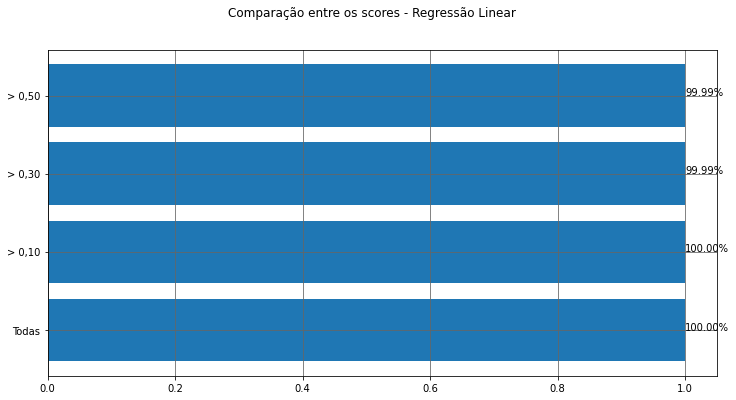

In [35]:
scores = [score_cols, score_cols_maior_01, score_cols_maior_03, score_cols_maior_05]
labels = ['Todas', '> 0,10', '> 0,30', '> 0,50']

fig, ax = plt.subplots(1, figsize=(12,6))
fig.suptitle('Comparação entre os scores - Regressão Linear')

ax.barh(labels, scores)
plt.grid(b=True, which='major', color='#666666', linestyle='-')

for index, score in enumerate(scores):
    plt.text(score, index, str('{:2.2f}'.format(score * 100) + '%'))

plt.show()